In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
us_state_abbrev = {
'ALABAMA': 'AL', 'ALASKA': 'AK', 'ARIZONA': 'AZ', 'ARKANSAS': 'AR', 'CALIFORNIA': 'CA', 'COLORADO': 'CO',
'CONNECTICUT': 'CT', 'DELAWARE': 'DE', 'FLORIDA': 'FL', 'GEORGIA': 'GA', 'HAWAII': 'HI', 'IDAHO': 'ID',
'ILLINOIS': 'IL', 'INDIANA': 'IN', 'IOWA': 'IA', 'KANSAS': 'KS', 'KENTUCKY': 'KY', 'LOUISIANA': 'LA',
'MAINE': 'ME', 'MARYLAND': 'MD', 'MASSACHUSETTS': 'MA', 'MICHIGAN': 'MI', 'MINNESOTA': 'MN', 'MISSISSIPPI': 'MS',
'MISSOURI': 'MO', 'MONTANA': 'MT', 'NEBRASKA': 'NE', 'NEVADA': 'NV', 'NEW HAMPSHIRE': 'NH', 'NEW JERSEY': 'NJ',
'NEW MEXICO': 'NM', 'NEW YORK': 'NY', 'NORTH CAROLINA': 'NC', 'NORTH DAKOTA': 'ND', 'OHIO': 'OH', 'OKLAHOMA': 'OK',
'OREGON': 'OR', 'PENNSYLVANIA': 'PA', 'RHODE ISLAND': 'RI', 'SOUTH CAROLINA': 'SC', 'SOUTH DAKOTA': 'SD',
'TENNESSEE': 'TN', 'TEXAS': 'TX', 'UTAH': 'UT', 'VERMONT': 'VT', 'VIRGINIA': 'VA', 'WASHINGTON': 'WA',
'WEST VIRGINIA': 'WV', 'WISCONSIN': 'WI', 'WYOMING': 'WY', 'DISTRICT OF COLUMBIA':'DC'}

In [11]:
#ToDo: add a shell script or something to automatically run nodejs scripts and update database from Python
madf = pd.read_csv('all_data_latest.csv')

# Data cleaning: add a State column and fill with abbreviated names. Fill also country name where missing
madf.loc[madf.Locality.str.contains("USA"), "Country"] = "USA"
for key, value in us_state_abbrev.items():
    madf.loc[madf.Locality.str.contains(value), "State"] = value
    madf.loc[madf.Locality.str.contains('(?i)' + key), "State"] = value
madf.loc[~madf.State.isnull(), 'Country'] = "USA"

# display dataframe
madf

Name  Classification  \
0                                           REMOVE LLC.             NaN   
1                        Carbondale Colorado Mutual Aid  MutualAidGroup   
2                                 Birmingham Mutual Aid             NaN   
3                        Kinlani (Flagstaff) Mutual Aid  MutualAidGroup   
4                                    Phoenix Mutual Aid  MutualAidGroup   
...                                                 ...             ...   
5885                          Spokane County Mutual Aid             NaN   
5886                     Rock County Mutual Aid Infohub             NaN   
5887   Wisconsin / Madison: COVID-19 Madison Mutual Aid             NaN   
5888  Coronavirus Quarantine Support with the Madiso...             NaN   
5889                                 Laramie Mutual Aid             NaN   

                                               Homepage  \
0                                  https://removela.com   
1     https://carbondalegov.org/government/emergency...   
2     https://docs.google.com/document/d/12wY7BG4wzI...   
3     https://docs.google.com/forms/d/e/1FAIpQLSe4pQ...   
4     https://docs.google.com/spreadsheets/d/1OVJ1AM...   
...                                                 ...   
5885  https://mutualaidspokanecounty.com/?fbclid=IwA...   
5886  https://docs.google.com/spreadsheets/d/1ym2k7D...   
5887  https://docs.google.com/spreadsheets/u/0/d/1P3...   
5888  https://docs.google.com/forms/d/e/1FAIpQLSdGqb...   
5889  https://docs.google.com/document/d/1d7aSkS1Fdx...   

                                            SocialMedia  \
0                                                   NaN   
1     https://www.facebook.com/groups/CarbondaleCOMu...   
2     https://www.facebook.com/groups/birminghammutu...   
3      https://www.facebook.com/groups/809321062887347/   
4     https://www.facebook.com/groups/14450449687246...   
...                                                 ...   
5885    https://www.facebook.com/SpokaneCountyMutualAid   
5886   https://www.facebook.com/groups/494748384527251/   
5887  https://www.facebook.com/groups/50240185064881...   
5888  https://www.facebook.com/madTownCommunitySelfD...   
5889                                                NaN   

                     Locality       Lat       Lng               Address  \
0     Los Angeles, California  34.05220 -118.2437                   NaN   
1        Carbondale, Colorado  39.40057 -107.2135  Carbondale, Colorado   
2         Birmingham, Alabama  33.51860  -86.8104                   NaN   
3          Flagstaff, Arizona  35.19830 -111.6513    Flagstaff, Arizona   
4            Phoenix, Arizona  33.44840 -112.0740      Phoenix, Arizona   
...                       ...       ...       ...                   ...   
5885              Spokane, WA       NaN       NaN                   NaN   
5886           Janesville, WI       NaN       NaN                   NaN   
5887              Madison, WI       NaN       NaN                   NaN   
5888              Madison, WI       NaN       NaN                   NaN   
5889              Laramie, WY       NaN       NaN                   NaN   

     Country                                        Description  \
0        USA  REMOVE is a small business modernizing trash a...   
1        USA                                                NaN   
2        USA                                                NaN   
3        USA                                                NaN   
4        USA                                                NaN   
...      ...                                                ...   
5885     USA                                                NaN   
5886     USA                                                NaN   
5887     USA                                                NaN   
5888     USA                                                NaN   
5889     USA                                                NaN   

                          

In [12]:
madf.Country.value_counts()

USA       1328
Canada       6
Name: Country, dtype: int64

In [13]:
madf.Address.value_counts()

New York City, New York, United States    20
Sants, Barcelona, España                  19
Baltimore, Maryland, United States        18
London                                    16
Sant Andreu, Barcelona, España            14
                                          ..
Stevenage                                  1
Hornsea                                    1
Boxted                                     1
Brookenby, Market Rasen, Lincolnshire      1
Armitage with Handsacre                    1
Name: Address, Length: 4933, dtype: int64

In [14]:
madf[madf.Country == "USA"].Classification.value_counts()

FacebookMutualAid     446
MutualAidGroup         55
InformationSite         3
NextdoorMutualAid       2
MutualAidLikeGroup      1
Name: Classification, dtype: int64

In [15]:
with pd.option_context('display.max_rows', None):
    display(madf[madf.State.isnull()].Locality.value_counts())

Sants, Barcelona, España                                                                                                                                                                                                        19
London                                                                                                                                                                                                                          16
Sant Andreu, Barcelona, España                                                                                                                                                                                                  14
UK                                                                                                                                                                                                                              13
London, UK                                                                                  

In [18]:
#load census data (from https://www.census.gov/data/datasets/time-series/demo/popest/2010s-state-detail.html#par_textimage_2063038847)
df_state = pd.read_csv('SCPRC-EST2019-18+POP-RES-1.csv')

#states have unique abbreviation code called 'STUSPS
madf['STUSPS'] = madf['State']
df_state['STUSPS'] = df_state['NAME'].str.upper().map(us_state_abbrev) ##Add column with state code (note PR and USA dropped)

#count number of groups in each state
state_stats = pd.DataFrame(madf['STUSPS'].value_counts()).reset_index()
state_stats.columns=['STUSPS','count']

#merge into states dataframe
df_state = df_state.merge(state_stats, on='STUSPS')
#calculate number of groups per capita
df_state['N_per_cap'] = df_state['count']*1./df_state['POPESTIMATE2019']
df_state

SUMLEV REGION DIVISION  STATE                  NAME  POPESTIMATE2019  \
0       40      3        6      1               Alabama          4903185   
1       40      4        9      2                Alaska           731545   
2       40      4        8      4               Arizona          7278717   
3       40      3        7      5              Arkansas          3017804   
4       40      4        9      6            California         39512223   
5       40      4        8      8              Colorado          5758736   
6       40      1        1      9           Connecticut          3565287   
7       40      3        5     10              Delaware           973764   
8       40      3        5     11  District of Columbia           705749   
9       40      3        5     12               Florida         21477737   
10      40      3        5     13               Georgia         10617423   
11      40      4        9     15                Hawaii          1415872   
12      40      4        8     16                 Idaho          1787065   
13      40      2        3     17              Illinois         12671821   
14      40      2        3     18               Indiana          6732219   
15      40      2        4     19                  Iowa          3155070   
16      40      2        4     20                Kansas          2913314   
17      40      3        6     21              Kentucky          4467673   
18      40      3        7     22             Louisiana          4648794   
19      40      1        1     23                 Maine          1344212   
20      40      3        5     24              Maryland          6045680   
21      40      1        1     25         Massachusetts          6892503   
22      40      2        3     26              Michigan          9986857   
23      40      2        4     27             Minnesota          5639632   
24      40      3        6     28           Mississippi          2976149   
25      40      2        4     29              Missouri          6137428   
26      40      4        8     30               Montana          1068778   
27      40      2        4     31              Nebraska          1934408   
28      40      4        8     32                Nevada          3080156   
29      40      1        1     33         New Hampshire          1359711   
30      40      1        2     34            New Jersey          8882190   
31      40      4        8     35            New Mexico          2096829   
32      40      1        2     36              New York         19453561   
33      40      3        5     37        North Carolina         10488084   
34      40      2        4     38          North Dakota           762062   
35      40      2        3     39                  Ohio         11689100   
36      40      3        7     40              Oklahoma          3956971   
37      40      4        9     41                Oregon          4217737   
38      40      1        2     42          Pennsylvania         12801989   
39      40      1        1     44          Rhode Island          1059361   
40      40      3        5     45        South Carolina          5148714   
41      40      2        4     46          South Dakota           884659   
42      40      3        6     47             Tennessee          6829174   
43      40      3        7     48                 Texas         28995881   
44      40      4        8     49                  Utah          3205958   
45      40      1        1     50               Vermont           623989   
46      40      3        5     51              Virginia          8535519   
47      40      4        9     53            Washington          7614893   
48      40      3        5     54         West Virginia          1792147   
49      40      2        3     55             Wisconsin          5822434   
50      40      4        8     56               Wyoming           578759   

    POPEST18PLUS2019  PCNT_POPEST18PLUS STUSPS  cou

## Plot N groups per capita in each state

Text(0, 0.5, 'Mutual Aid Groups per Capita')

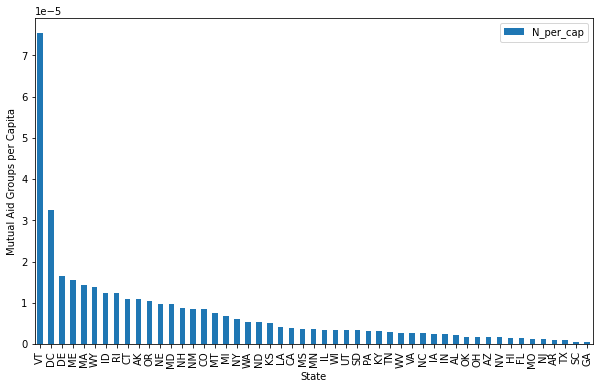

In [20]:
df_state.sort_values(by='N_per_cap', ascending=False).plot.bar(x='STUSPS',y='N_per_cap', figsize=(10,6))
plt.xlabel('State')
plt.ylabel('Mutual Aid Groups per Capita')

{'init': 'epsg:4326'}


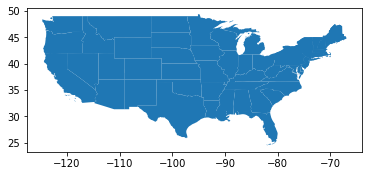

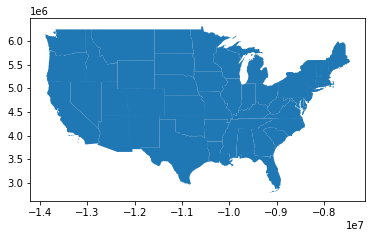

In [24]:
import geopandas as gpd

# load GeoDataFrame object from file, which contains shape information and inherits from Pandas DataFrame
# see e.g. https://jcutrer.com/python/learn-geopandas-plotting-usmaps for useful things
states = gpd.read_file('shape_data/usa-states-census-2014.shp')

# shape data depends on projection. 
print(states.crs) # default projection is EPSG 4326
states.plot() # plot default projection
states.to_crs(epsg='3395').plot() ##Plot Mercator projection. 
states = states.to_crs(epsg='3395') #convert to Mercator

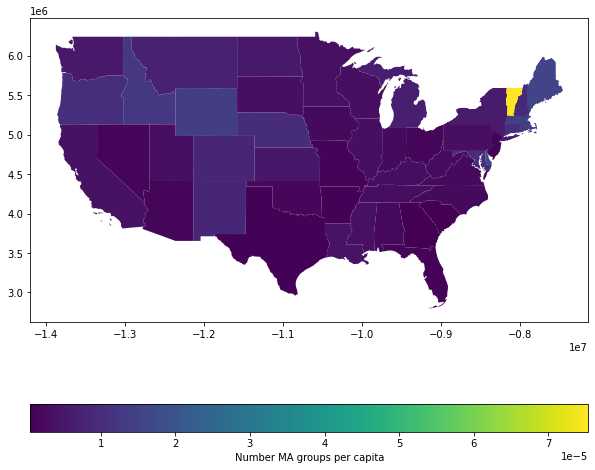

In [26]:
##https://geopandas.readthedocs.io/en/latest/docs/user_guide/mapping.html
f,ax=plt.subplots(figsize=((10,10)))
ax=states.merge(df_state, on='STUSPS').plot(column='N_per_cap', cmap='viridis', legend=True, ax=ax,
                                              legend_kwds={'label': "Number MA groups per capita",
                                                'orientation': "horizontal"})